In [34]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf # linear modeling
import matplotlib.pyplot as plt # plotting
import matplotlib.lines as mlines
import statsmodels.api as sm
import seaborn as sns
import warnings

In [4]:
por = pd.read_csv("student-alcohol-consumption/student-mat.csv")
math = pd.read_csv("student-alcohol-consumption/student-por.csv")

In [51]:
df = pd.concat([por,math], sort= True)
df

## Make a copy of the dataframe for statistical analysis
df_stats = pd.concat([por,math], sort= True, ignore_index=False)

## Make a copy of the dataframe to print out
df_nice = pd.concat([por,math], sort= True, ignore_index=False)

## Changing numeric variables to categorical variables
df_stats['internet'] = df_stats.internet.factorize( ['yes', 'no'] )[0]
df_stats['activities'] = df_stats.activities.factorize( ['yes', 'no'] )[0]
df_stats['romantic'] = df_stats.romantic.factorize( ['yes', 'no'] )[0]
df_stats["Dalc"] = df_stats["Dalc"].values
df_stats["goout"] = df_stats["goout"].values.astype(str).astype(int)

## Creating new variables "social index"
df_stats["index"] = df_stats['goout'] * 0.25 + df_stats['internet'] * 0.02 + df_stats['romantic'] * 0.03 + df_stats['activities'] * -0.01
df_nice["Social Index"] = df_stats["index"]

## Creating new variables "drinking index"
df_stats["drinking"] = (df_stats["Walc"] * 5 + df_stats["Dalc"] * 2) / 7 
df_nice["Drinking Index"] = df_stats["drinking"]


df_nice.head()

0      1.00
1      0.77
2      0.52
3      0.54
4      0.50
5      0.51
6      1.02
7      1.00
8      0.52
9      0.26
10     0.77
11     0.51
12     0.76
13     0.77
14     0.55
15     1.02
16     0.76
17     0.49
18     1.26
19     0.76
20     0.27
21     0.52
22     0.26
23     1.01
24     0.51
25     0.52
26     0.52
27     1.02
28     0.76
29     1.29
       ... 
619    0.55
620    1.04
621    0.50
622    1.00
623    0.55
624    0.30
625    0.80
626    0.55
627    0.79
628    0.77
629    1.26
630    1.02
631    0.52
632    0.80
633    0.76
634    0.80
635    1.01
636    1.01
637    0.79
638    0.76
639    0.50
640    0.75
641    0.75
642    1.02
643    0.79
644    0.51
645    1.02
646    0.24
647    1.27
648    0.27
Name: Social Index, Length: 1044, dtype: float64

## Project Overview

## The Purpose of Our Project

## Data Preparation and Cleaning

In [113]:
## Explore 
import plotly
import plotly.plotly as py
import plotly.tools as tls
import plotly.graph_objs as go

plotly.tools.set_credentials_file(username='JYCestelle', api_key='zZMBwVVRPMG0Dj5GL2Fd')

In [151]:
# Age Distribution - plotly
data = [go.Bar(
            x= df['age'].value_counts(),
            y= df['age'].value_counts().index,
            marker=dict(
                color='rgba(122, 120, 168, 0.8)',
            ),
            orientation = 'h', 
            name='Name of Trace 1'
)]

layout = go.Layout(
    title='Plot Title',
    xaxis=dict(
        title='Occurrence of particular age'),
    yaxis=dict(
        title='Age')
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='horizontal-bar')

# draw graph using matplotlib
# plt.figure(figsize=(15, 8))
# plt.barh(df['age'].value_counts().index, df['age'].value_counts(), align='center', alpha=0.5)
# plt.xlabel("Occurrence of particular age.")
# plt.ylabel("Age")
# plt.title("Age Distribution")
# plt.show()

/Users/orange/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



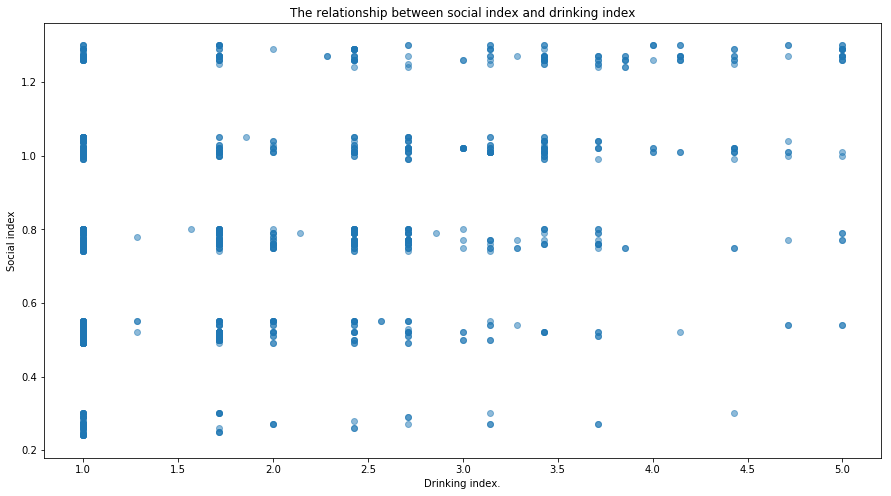

In [59]:
# relationship between social factors and drinking level
plt.figure(figsize=(15, 8))
plt.scatter(df_nice["Drinking Index"], df_nice["Social Index"], alpha=0.5)
plt.xlabel("Drinking index.")
plt.ylabel("Social index")
plt.title("The relationship between social index and drinking index")
plt.show()

In [152]:
dr = df['Dalc'].value_counts().tolist()
wr = df['Walc'].value_counts().tolist()

In [136]:
trace0 = go.Bar(
    x = df['Dalc'].value_counts().index.tolist(),
    y = dr,
    name='Daily Alcohol Consumption',
    marker=dict(
        color='rgb(49,130,189)'
    )
)
trace1 = go.Bar(
    x = df['Walc'].value_counts().index,
    y = wr,
    name='Weekends Alcohol Consumption',
    marker=dict(
        color='rgb(204,204,204)',
    )
)

data = [trace0, trace1]
layout = go.Layout(
    xaxis=dict(tickangle=-45),
    barmode='group',   
    title='Daily Alcohol Consumption VS Weekends Alcohol Consumption',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='angled-text-bar')

/Users/orange/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead

